<h1>Mojaglobal_Kenya_Analysis<h1/>

<h2>Importing necessary libraries<h2/>

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read the JSON file into a pandas dataframe
soil_kenya= pd.read_json('KEN_AL2_Kenya_WSR.json')
soil_kiambu= pd.read_json('KEN_AL4_Kiambu County_WSR.json')
climate_kenya= pd.read_json('KEN_AL2_Kenya_GEZ.json')
climate_kiambu= pd.read_json('KEN_AL4_Kiambu County_GEZ.json')
forest_cover=pd.read_json('KEN_Kenya_SDPT.json')


# read into gpd

soil_kenya2 = gpd.read_file('KEN_AL2_Kenya_WSR.json')
soil_kiambu2= gpd.read_file('KEN_AL4_Kiambu County_WSR.json')
climate_kenya2 = gpd.read_file('KEN_AL2_Kenya_GEZ.json')
climate_kiambu2= gpd.read_file('KEN_AL4_Kiambu County_GEZ.json')
forest_cover2=gpd.read_file('KEN_Kenya_SDPT.json')

<h2>Administrative boundaries<h2/>

In [2]:
bound_kenya= pd.read_json('KEN_AL2_Kenya_boundary.json')
bound_kenya2= gpd.read_file('KEN_AL2_Kenya_boundary.json')


In [3]:
bound_kenya2.head()

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,KEN,,Kenya,Kenya,Kenya,,administrative,2,Q114,en:Kenya,2019-03-22 23:19:02,"MULTIPOLYGON (((39.37506 -4.71945, 39.37096 -4..."


In [4]:
#Reading the contents from zipfile into a dataframe

import zipfile
import pandas as pd

# Open the zip file
with zipfile.ZipFile('KEN-20230327T121938Z-001.zip', 'r') as archive:

    # Loop through the files in the archive
    dataframes = []
    for filename in archive.namelist():

        # Extract only the JSON files
        if filename.endswith('.json'):

            # Load the JSON data into a dataframe
            with archive.open(filename) as file:
                df = pd.read_json(file)

            # Append the dataframe to the list
            dataframes.append(df)

    # Concatenate the dataframes into a single dataframe
    combined_df = pd.concat(dataframes)
combined_df


,type,name,features
0,FeatureCollection,KEN_AL4_Wajir_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
0,FeatureCollection,KEN_AL4_Kiambu County_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
0,FeatureCollection,KEN_AL4_Uasin Gishu_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
0,FeatureCollection,KEN_AL4_Tharaka-Nithi_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
1,FeatureCollection,KEN_AL4_Tharaka-Nithi_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
...,...,...,...
0,FeatureCollection,KEN_AL4_Turkana.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
0,FeatureCollection,KEN_AL4_Bungoma.json,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
0,FeatureCollection,KEN_AL4_Embu County.json,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
0,FeatureCollection,KEN_AL4_Bomet.json,"{'type': 'Feature', 'geometry': {'type': 'Poly..."


<h2>Soil distribution<h2/>

In [5]:
# display the dataframe
soil_kenya.head()

,type,name,features
0,FeatureCollection,KEN_AL2_Kenya_WSR.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,KEN_AL2_Kenya_WSR.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,KEN_AL2_Kenya_WSR.json,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
3,FeatureCollection,KEN_AL2_Kenya_WSR.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,KEN_AL2_Kenya_WSR.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [6]:
# display the dataframe
soil_kenya2.head()

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,KEN,,Kenya,CL,29,Calcisol,2,"MULTIPOLYGON (((36.69084 2.83062, 36.69098 2.8..."
1,KEN,,Kenya,FR,26,Ferralsol,2,"MULTIPOLYGON (((34.11435 -0.21476, 34.11357 -0..."
2,KEN,,Kenya,LP,18,Leptosol,2,"POLYGON ((35.66344 4.61783, 35.66222 4.61778, ..."
3,KEN,,Kenya,LX,6,Lixisol,2,"MULTIPOLYGON (((39.37022 -4.65964, 39.36823 -4..."
4,KEN,,Kenya,NT,24,Nitisol,2,"MULTIPOLYGON (((39.20660 -4.67241, 39.20632 -4..."


In [7]:
soil_kenya2['IPCC'].value_counts()

Calcisol       1
Ferralsol      1
Leptosol       1
Lixisol        1
Nitisol        1
Vertisol       1
Waterbodies    1
Name: IPCC, dtype: int64

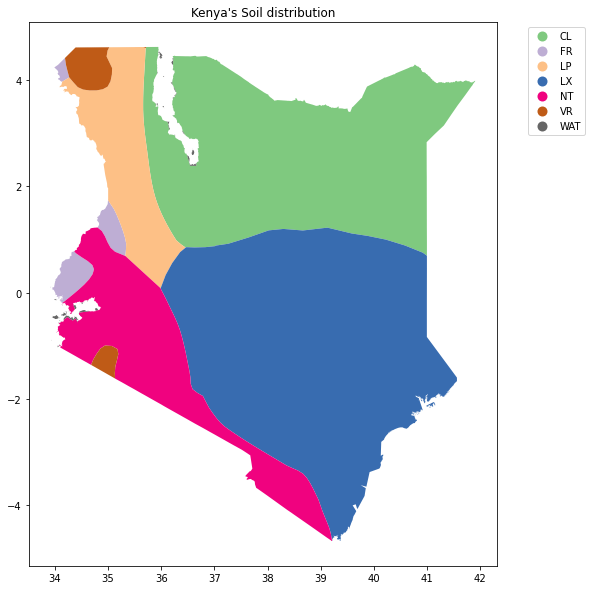

In [8]:
# Plot the GeoDataFrame with the SNAME column
fig, ax = plt.subplots(figsize=(10,10))
soil_kenya2.plot(column='SNAME', ax=ax,legend=True,legend_kwds={'loc': 'upper right', 'bbox_to_anchor': (1.2, 1)},cmap='Accent')
plt.title("Kenya's Soil distribution")
plt.show()

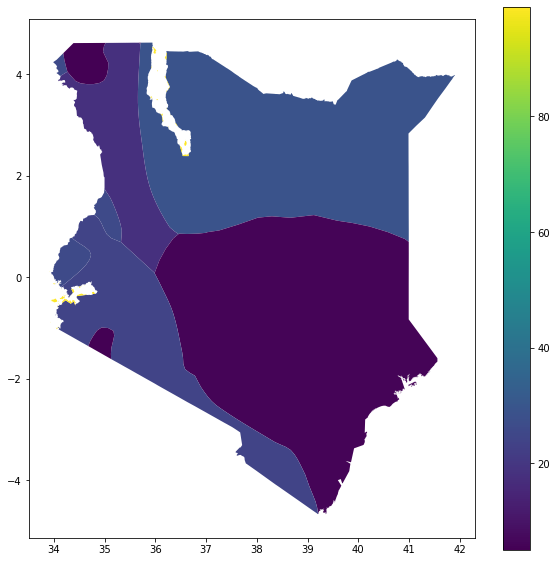

In [9]:

# Plot the GeoDataFrame with the mg_code column
fig, ax = plt.subplots(figsize=(10,10))
soil_kenya2.plot(column='mg_code', ax=ax,legend=True)
plt.show()

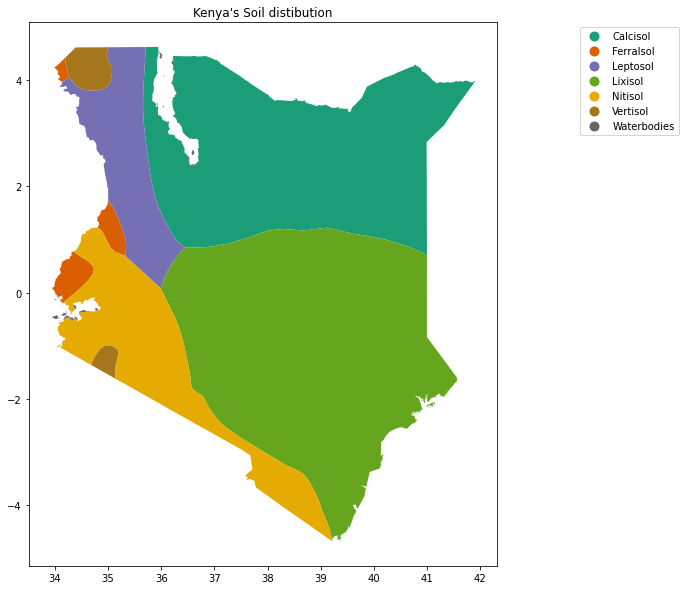

In [10]:

# Plot the GeoDataFrame with the IPCC column
fig, ax = plt.subplots(figsize=(10,10))
soil_kenya2.plot(column='IPCC', ax=ax,legend=True,legend_kwds={'loc': 'upper right', 'bbox_to_anchor': (1.4, 1)},cmap='Dark2')
plt.title("Kenya's Soil distibution")
plt.show()


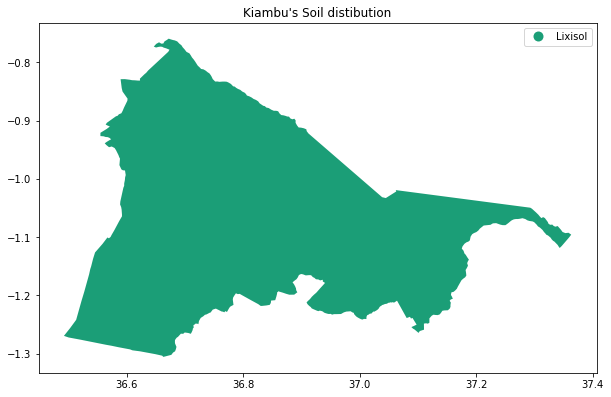

Lixisol is the main type of soil in Kiambu.


In [11]:
#Plotting main type of soil in kiambu
fig, ax = plt.subplots(figsize=(10,10))
soil_kiambu2.plot(column='IPCC', ax=ax,legend=True,legend_kwds={'loc': 'upper right', 'bbox_to_anchor': (1, 1)},cmap='Dark2')
plt.title("Kiambu's Soil distibution")
plt.show()
print('Lixisol is the main type of soil in Kiambu.')

<h2>Climate Distribution.<h2/>

In [12]:
#Viewing the dataset
climate_kenya.head()

,type,name,features
0,FeatureCollection,KEN_AL2_Kenya_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,KEN_AL2_Kenya_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,KEN_AL2_Kenya_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,KEN_AL2_Kenya_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,KEN_AL2_Kenya_GEZ.json,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [13]:
climate_kenya2.head()

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,KEN,,Kenya,Tropical dry forest,13,TAwb,2,"MULTIPOLYGON (((34.76935 -0.29384, 34.76875 -0..."
1,KEN,,Kenya,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((39.59500 -4.06283, 39.59465 -4..."
2,KEN,,Kenya,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((38.45417 -3.34256, 38.41297 -3..."
3,KEN,,Kenya,Tropical rainforest,11,TAr,2,"MULTIPOLYGON (((39.22227 -4.66908, 39.22226 -4..."
4,KEN,,Kenya,Tropical shrubland,14,TBSh,2,"MULTIPOLYGON (((36.41257 -1.41796, 36.38317 -1..."


In [14]:
climate_kenya2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     6 non-null      object  
 1   ISO3166_2   6 non-null      object  
 2   name        6 non-null      object  
 3   gez_name    6 non-null      object  
 4   gez_code    6 non-null      int64   
 5   gez_abbrev  6 non-null      object  
 6   adminlevel  6 non-null      int64   
 7   geometry    6 non-null      geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 512.0+ bytes


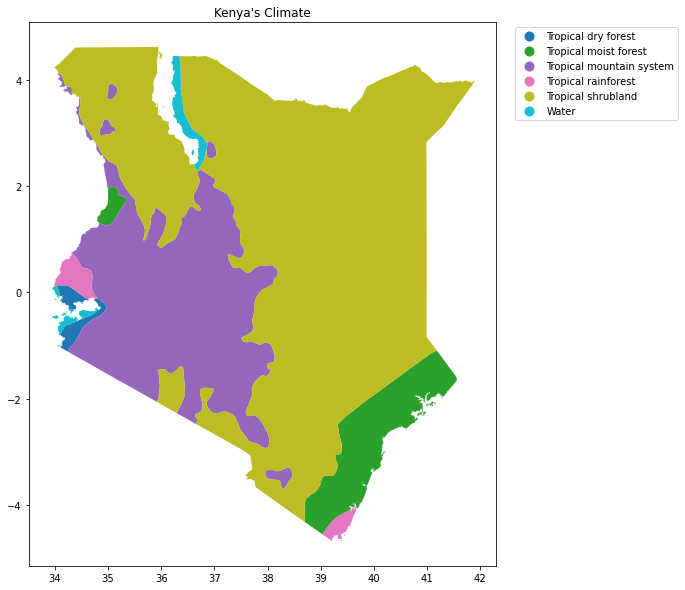

The most popular climate in kenya is Tropical shrubland and tropical mountain system.


In [15]:
#Plotting to see the distribution of kenya's climate
# Plot the GeoDataFrame with the gez name column
fig, ax = plt.subplots(figsize=(10,10))
climate_kenya2.plot(column='gez_name', ax=ax,legend=True,legend_kwds={'loc': 'upper right', 'bbox_to_anchor': (1.4, 1)})
plt.title("Kenya's Climate")

plt.show()
print('The most popular climate in kenya is Tropical shrubland and tropical mountain system.')

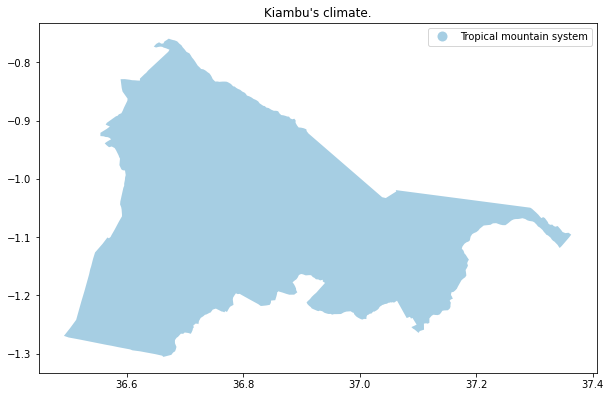

Tropical mountain system is the main type of climate in Kiambu.


In [16]:

#plotting kiambu's climate 
fig, ax = plt.subplots(figsize=(10,10))
climate_kiambu2.plot(column='gez_name', ax=ax,legend=True,legend_kwds={'loc': 'upper right', 'bbox_to_anchor': (1, 1)},cmap='Paired')
plt.title("Kiambu's climate.")
plt.show()
print('Tropical mountain system is the main type of climate in Kiambu.')

<h2>Planted Forest Cover<h2/>

In [17]:
forest_cover.head()

,type,name,features
0,FeatureCollection,KEN_Kenya_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
1,FeatureCollection,KEN_Kenya_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
2,FeatureCollection,KEN_Kenya_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
3,FeatureCollection,KEN_Kenya_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."
4,FeatureCollection,KEN_Kenya_SDPT,"{'type': 'Feature', 'geometry': {'type': 'Poly..."


In [18]:
forest_cover2.head()

,final_id,iso,country,org_name,common_name,species,species_simp,plant_ag,timber_ag,ever_dec,conifer_broad,hard_soft,size,source,year,geometry
0,KEN_7215,KEN,Kenya,Orchard,Unknown,Unknown,Unknown,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Open street map,Unknown,"POLYGON ((38.43522 -3.33087, 38.43530 -3.33040..."
1,KEN_7215,KEN,Kenya,Orchard,Unknown,Unknown,Unknown,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Open street map,Unknown,"POLYGON ((40.84254 -2.31403, 40.84204 -2.31369..."
2,KEN_7215,KEN,Kenya,Orchard,Unknown,Unknown,Unknown,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Open street map,Unknown,"POLYGON ((40.84454 -2.31252, 40.84432 -2.31200..."
3,KEN_7215,KEN,Kenya,Orchard,Unknown,Unknown,Unknown,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Open street map,Unknown,"POLYGON ((40.86680 -2.29576, 40.86732 -2.29557..."
4,KEN_7215,KEN,Kenya,Orchard,Unknown,Unknown,Unknown,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Open street map,Unknown,"POLYGON ((40.87098 -2.29469, 40.87121 -2.29435..."


In [19]:
forest_cover2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   final_id       5854 non-null   object  
 1   iso            5854 non-null   object  
 2   country        5854 non-null   object  
 3   org_name       5854 non-null   object  
 4   common_name    5854 non-null   object  
 5   species        5854 non-null   object  
 6   species_simp   5854 non-null   object  
 7   plant_ag       5854 non-null   object  
 8   timber_ag      5854 non-null   object  
 9   ever_dec       5854 non-null   object  
 10  conifer_broad  5854 non-null   object  
 11  hard_soft      5854 non-null   object  
 12  size           5854 non-null   object  
 13  source         5854 non-null   object  
 14  year           5854 non-null   object  
 15  geometry       5854 non-null   geometry
dtypes: geometry(1), object(15)
memory usage: 731.9+ KB


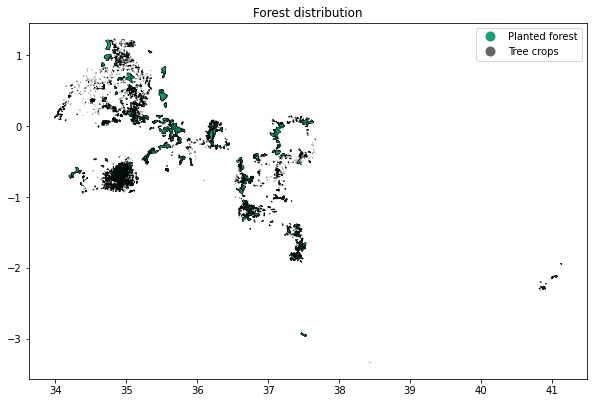

In [20]:

# Load shapefile of country boundary
country = gpd.read_file("KEN_Kenya_SDPT.json")

# Plot forest cover data on top of country boundary
fig, ax = plt.subplots(figsize=(10,10))
country.plot(ax=ax, facecolor='none', edgecolor='black')
forest_cover2.plot(column='plant_ag', ax=ax, legend=True, legend_kwds={'loc': 'upper right', 'bbox_to_anchor': (1.0, 1)}, cmap='Dark2')
plt.title("Forest distribution")

plt.show()
